<h2>Lab 6: Compresia de imagini folosind descompunerea in valori singulara </h2>

### Preliminarii
**Descompunerea valorilor singulare (DVS)** a unei matrice este descrisă de următoarea teoremă.


**Teorema.** Pentru orice matrice $A \in \mathbb{R}^{m \times n}$ există matricele ortogonale $U \in \mathbb{R}^{m \times m}$ şi $V \in \mathbb{R}^{n \times n}$ astfel încât

$$
U^T A V=\Sigma=\left[\begin{array}{cc}
\Sigma_1 & 0 \\
0 & 0
\end{array}\right],
$$

unde

$$
\Sigma_1=\operatorname{diag}\left(\sigma_1, \sigma_2, \ldots, \sigma_r\right) \in \mathbb{R}^{r \times r}
$$

cu

$$
\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_r>0 .
$$


Numerele pozitive $\sigma_i,\, i=1: p,\, p=\min (m, n)$, ordonate descrescător

$$
\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r>0, \sigma_{r+1}=\sigma_{r+2}=\cdots=\sigma_p=0
$$

se numesc **valori singulare** ale matricei $A$. Coloanele $u_j \in \mathbb{R}^m$ ale matricei ortogonale $U$ se numesc *vectori singulari stânga* ai matricei $A$. Coloanele $v_j \in \mathbb{R}^n$ ale matricei ortogonale $V$ se numesc *vectori singulari dreapta* ai matricei $A$. Relaţia (6.1) poate fi scrisă alternativ

$$
A=U \Sigma V^T=\sum_{j=1}^r \sigma_j u_j v_j^T .
$$


DVS a unei matrice scoate în evidenţă numeroase aspecte structurale ale matricei respective şi are multiple valenţe aplicative.

#### Aplicatii

**1. Calculul rangului unei matrice**


Fie $A=U \Sigma V^T$ DVS a matricei $A \in \mathbb{R}^{m \times n}$. Întrucât înmulţirea cu matrice nesingulare nu modifică rangul unei matrice, rangul lui $A$ este rangul lui $\Sigma$. Prin urmare, **rangul unei matrice este dat de numărul valorilor sale singulare nenule**.

În general, din cauza erorilor de rotunjire, valorile proprii calculate $\hat{\sigma}_i$ vor fi toate nenule, i.e.

$$
\hat{\sigma}_1 \geq \hat{\sigma}_2 \geq \cdots \geq \hat{\sigma}_p>0 .
$$


De aceea în practica numerică se utilizează conceptul de rang numeric. Rangul numeric se obţine neglijând valorile singulare mici, e.g. inferioare unei toleranţe precizate $\varepsilon$

$$
\hat{\sigma}_i \leq \varepsilon .
$$


Dacă indicele $i=r+1$ este primul pentru care (6.9) este satisfăcută, atunci rangul numeric al matricei $A$ este

$$
\operatorname{rang}(A, \varepsilon)=r .
$$

**2. Aproximarea de rang mic a unei matrice**

Dându-se o matrice $A \in \mathbb{R}^{m \times n}$, ne punem problema aproximării ei cu o matrice $A_k$ cu rang $k$. Mai mult, vrem ca aproximaţia să fie optimă, adică $\left\|A-A_k\right\|$ să fie minimă. DVS furnizeaza direct aceasta aproximaţie prin simpla trunchiere la cele mai mari $k$ valori singulare:

$$
A_k=\sum_{j=1}^k \sigma_j u_j v_j^T=U(:, 1: k) \Sigma(1: k, 1: k) V(:, 1: k)^T .
$$

**Aproximaţiile de rang mic** sunt utile pentru simplificarea (comprimarea) unor reprezentări sau pentru a găsi subspaţii reprezentative de dimensiune mică (analiza componentelor principale, etc.).


### Compresia de imagine

Alegeti o imagine de dimensiune minim $300 \times 300$ si maxim $1000 \times 1000$

In [2]:
%pip install scikit-image opencv-python

  Using cached numpy-2.3.5-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 617.4 kB/s  0:00:24m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 829.6 kB/s  0:02:15m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 1.8 MB/s  0:00:09 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.2 MB/s  0:00:00 eta 0:00:01
Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (7.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 2.1 MB/s  0:00:16m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [scikit-image] [scikit-image]]
Note: you may need to restart the kernel to use updated packages.


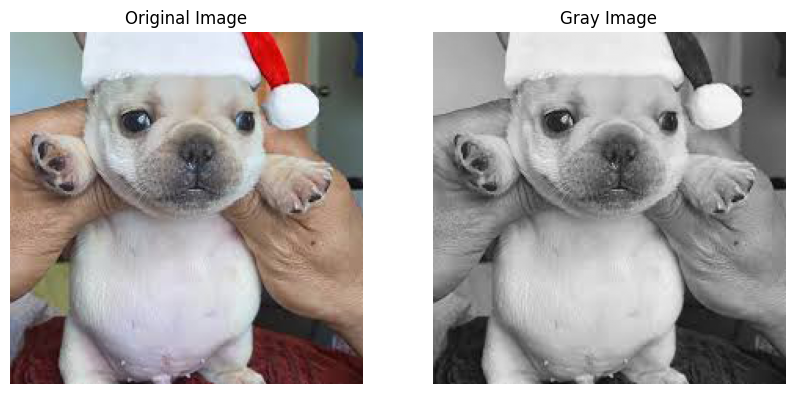

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from cv2 import imread

#Cititi o imagine rgb la alagere (Atentie schimbati nume_imagine cu numele imaginei alese)
Img =  mpimg.imread('pibble.png') # remarca: matplotlib accepta doar imagini .png

fig = plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gray Image")
grayImg = rgb2gray(rgba2rgb(Img))
plt.imshow(grayImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis("off")

plt.show()

Cerinta 1 (0.6p): Aplicati svd pe imaginea gray utilizand functian <b>np.linalg.svd</b>

In [7]:
u, s, vt = np.linalg.svd(grayImg, full_matrices=False)
# u: vectori singulari la dreapta
# s: vectorul cu valori singulare (matrice diagonala)
# vt: vectori singulari la stanga (transpus)

print("--- SVD Result ---")
print(f"Shape of U:  {u.shape}")
print(f"Shape of S:  {s.shape}")
print(f"Shape of Vt: {vt.shape}")

np.set_printoptions(precision=2, suppress=True)
print("U =", u)
print("S =", s)
print("Vt =", vt)

--- SVD Result ---
Shape of U:  (225, 225)
Shape of S:  (225,)
Shape of Vt: (225, 225)
U = [[-0.08  0.05 -0.08 ... -0.04 -0.06  0.13]
 [-0.08  0.05 -0.08 ...  0.12  0.09 -0.16]
 [-0.08  0.05 -0.08 ... -0.12 -0.03  0.04]
 ...
 [-0.04  0.02  0.17 ... -0.   -0.   -0.01]
 [-0.04  0.01  0.15 ... -0.01  0.02  0.  ]
 [-0.04  0.    0.15 ...  0.01 -0.01  0.01]]
S = [133.66  23.39  15.63  13.1    9.22   8.84   7.05   6.45   5.52   4.93
   3.92   3.61   3.4    3.13   2.79   2.64   2.54   2.44   2.22   2.03
   1.95   1.9    1.83   1.78   1.73   1.7    1.6    1.59   1.52   1.47
   1.42   1.38   1.32   1.27   1.26   1.22   1.15   1.12   1.11   1.06
   1.03   1.     0.99   0.97   0.93   0.91   0.9    0.89   0.87   0.85
   0.84   0.83   0.8    0.77   0.76   0.75   0.74   0.73   0.7    0.69
   0.68   0.66   0.66   0.65   0.64   0.62   0.61   0.59   0.58   0.58
   0.56   0.55   0.54   0.53   0.52   0.51   0.5    0.49   0.49   0.48
   0.47   0.46   0.46   0.45   0.44   0.43   0.43   0.42   0.42   0.41
  

Cerinta 2 (0.6p): Plotati valorile singulare obtinute la cerinta anterioara pe scala logaritmica utilizand <b>plt.semilogy</b>

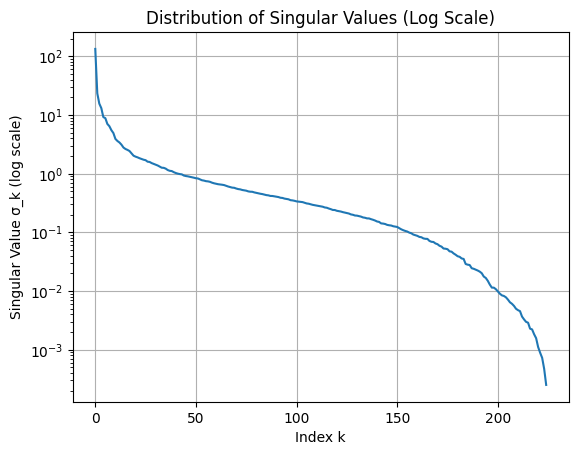

In [30]:
plt.figure()

plt.semilogy(s)

plt.title('Distribution of Singular Values (Log Scale)')
plt.xlabel('Index k')
plt.ylabel('Singular Value σ_k (log scale)')
plt.grid(True)

plt.show()

Cerinta 3 (0.6p): Plotati graficul procent informatie vs valori singulare
(Hint: utilizati functia <b>np.cumsum</b>)

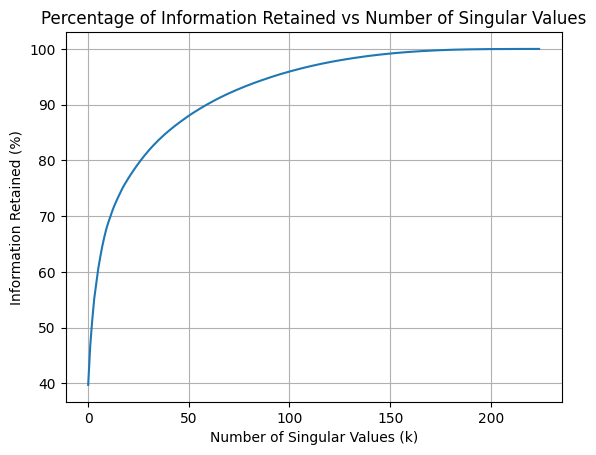

In [9]:
cumulative_s = np.cumsum(s)

total_s = np.sum(s)
percent_info = (cumulative_s / total_s) * 100

plt.figure()
plt.plot(percent_info)

plt.title('Percentage of Information Retained vs Number of Singular Values')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Information Retained (%)')
plt.grid(True)

plt.show()

Cerinta 4 (0.6p): In urma analizei graficului procent informatie vs valori singulare generati
un vector de dimensiune minim 5. Utilizati elementele vectorului pentru a reconstrui imaginile.  Evaluati calitatea imaginei compresate analizand [psnr](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) and [ssim](https://scikit-image.org/docs/0.25.x/auto_examples/transform/plot_ssim.html)

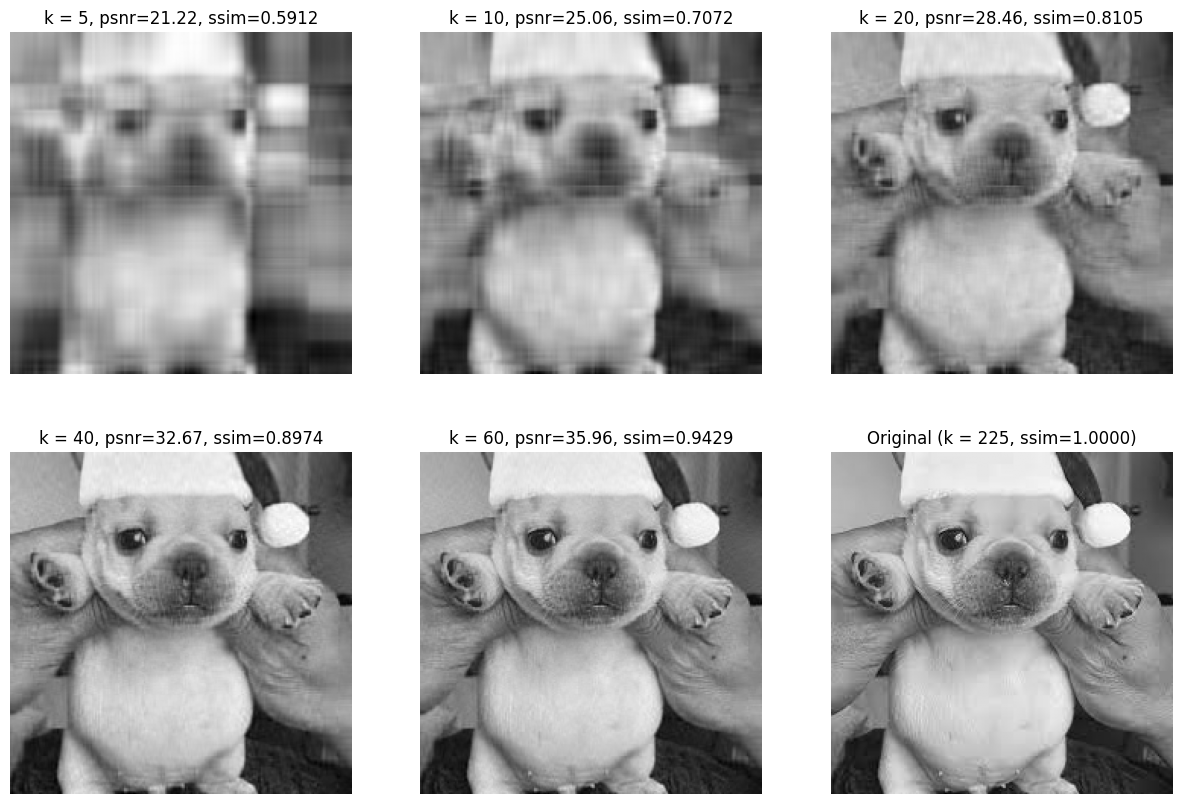

In [36]:
k_values = [5, 10, 20, 40, 60]
reconstructed_imgs = []
reconstructed_imgs_size = []

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
  # alegem primele k valori singulare si vectorii corespunzatori
  reconstructed_imgs.append(np.dot(u[:, :k], np.dot(np.diag(s[:k]), vt[:k, :])))

  # analizam calitatea reconstructiei cu psnr si ssim
  psnr_value = psnr(grayImg, reconstructed_imgs[-1])
  ssim_value = ssim(grayImg, reconstructed_imgs[-1], data_range=reconstructed_imgs[-1].max() - reconstructed_imgs[-1].min())
  
  # calculam dimensiunea imaginii reconstruite
  reconstructed_imgs_size.append(u[:, :k].nbytes + np.diag(s[:k]).nbytes + vt[:k, :].nbytes)

  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstructed_imgs[i], plt.get_cmap('gray'))
  plt.title(f'k = {k}, psnr={psnr_value:.2f}, ssim={ssim_value:.4f}')
  plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(grayImg, plt.get_cmap('gray'))
plt.title(f'Original (k = {len(s)}, ssim=1.0000)')
plt.axis('off')

plt.show()

Cerinta 5 (0.6p): Folositi ` nbytes` pentru a calcula dimensiunea în memorie a imaginii originale și a reprezentării comprimate pentru un $k$ ales de voi.
` nbytes` este o proprietate a unui obiect NumPy (de tip ndarray) care îți spune câți bytes ocupă matricea în memorie.

Determinati raportul de compresie și economia de memorie obținută:
$$
\text { Raport de compresie }=\frac{\text { Dimensiune originală }}{\text { Dimensiune comprimată }}
$$
si
$$
\text { Memory Saving }(\%)=\left(1-\frac{\text { dim. compresat }}{\text { dim. original }}\right) \times 100
$$

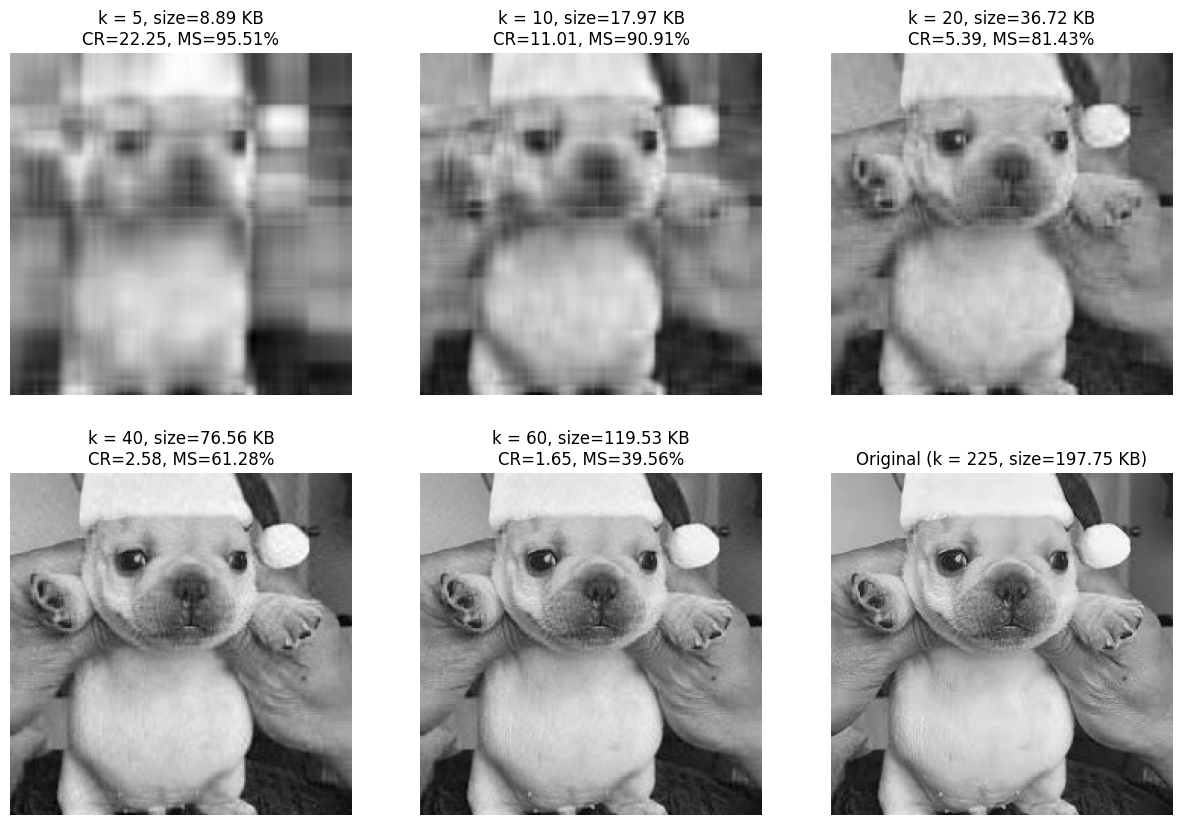

In [35]:
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
  compression_ratio = (grayImg.nbytes) / reconstructed_imgs_size[i]
  memory_saving = 100 * (1 - (reconstructed_imgs_size[i] / grayImg.nbytes))

  plt.subplot(2, 3, i + 1)
  plt.imshow(reconstructed_imgs[i], plt.get_cmap('gray'))
  plt.title(f'k = {k}, size={reconstructed_imgs_size[i] / 1024:.2f} KB\nCR={compression_ratio:.2f}, MS={memory_saving:.2f}%')
  plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(grayImg, plt.get_cmap('gray'))
plt.title(f'Original (k = {len(s)}, size={grayImg.nbytes / 1024:.2f} KB)')
plt.axis('off')

plt.show()